In [20]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BeganPatientsCare  5 non-null      float64
 1   TaughtAboutDrugs   5 non-null      float64
 2   RiskOfFalling      5 non-null      float64
 3   Depression         5 non-null      float64
 4   FluShot            5 non-null      float64
 5   PneumoniaShot      5 non-null      float64
 6   FootCare           5 non-null      float64
 7   Pain               5 non-null      float64
 8   TreatedPain        5 non-null      float64
 9   HeartFailure       5 non-null      float64
 10  BedSores           5 non-null      float64
 11  PreventBedSores    5 non-null      float64
 12  BedSoresRisk       5 non-null      float64
 13  Walking            5 non-null      float64
 14  InOutBed           5 non-null      float64
 15  Bathing            5 non-null      float64
 16  MovingAround       5 non-null 

/tmp/ipykernel_33/579714027.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = scaled_data.applymap(lambda x: not check_numeric(x))
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


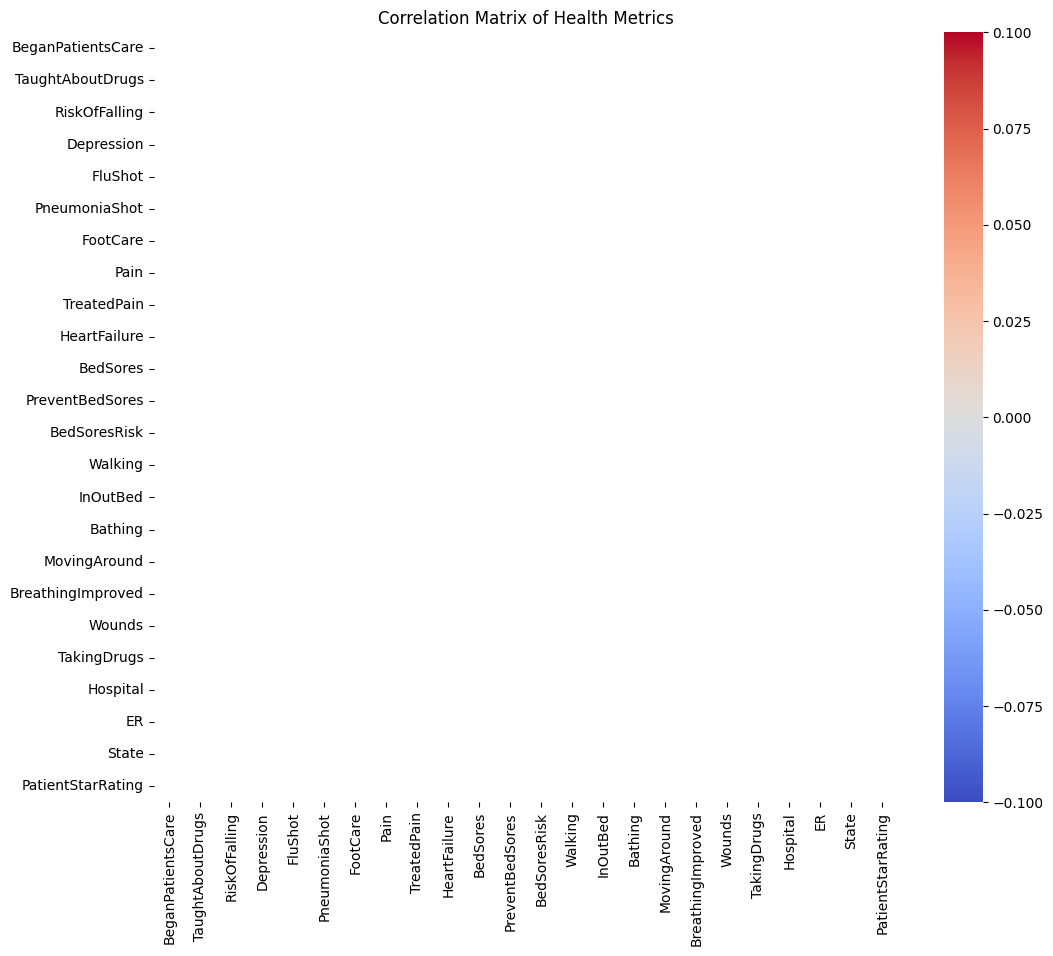

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `scaled_data` is your DataFrame

# 1. Check Data Types
print(scaled_data.info())

# 2. Identify Non-Numeric Values
def check_numeric(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# Check for non-numeric values in the DataFrame
non_numeric = scaled_data.applymap(lambda x: not check_numeric(x))
print("Non-numeric values in the DataFrame:")
print(non_numeric[non_numeric])

# 3. Handle NaN Values
# Drop columns where all values are NaN
scaled_data = scaled_data.dropna(axis=1, how='all')

# Convert remaining columns to numeric, coercing errors to NaN
scaled_data = scaled_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
scaled_data = scaled_data.dropna()

# 4. Compute Correlation Matrix
correlation_matrix = scaled_data.corr()

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health Metrics')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

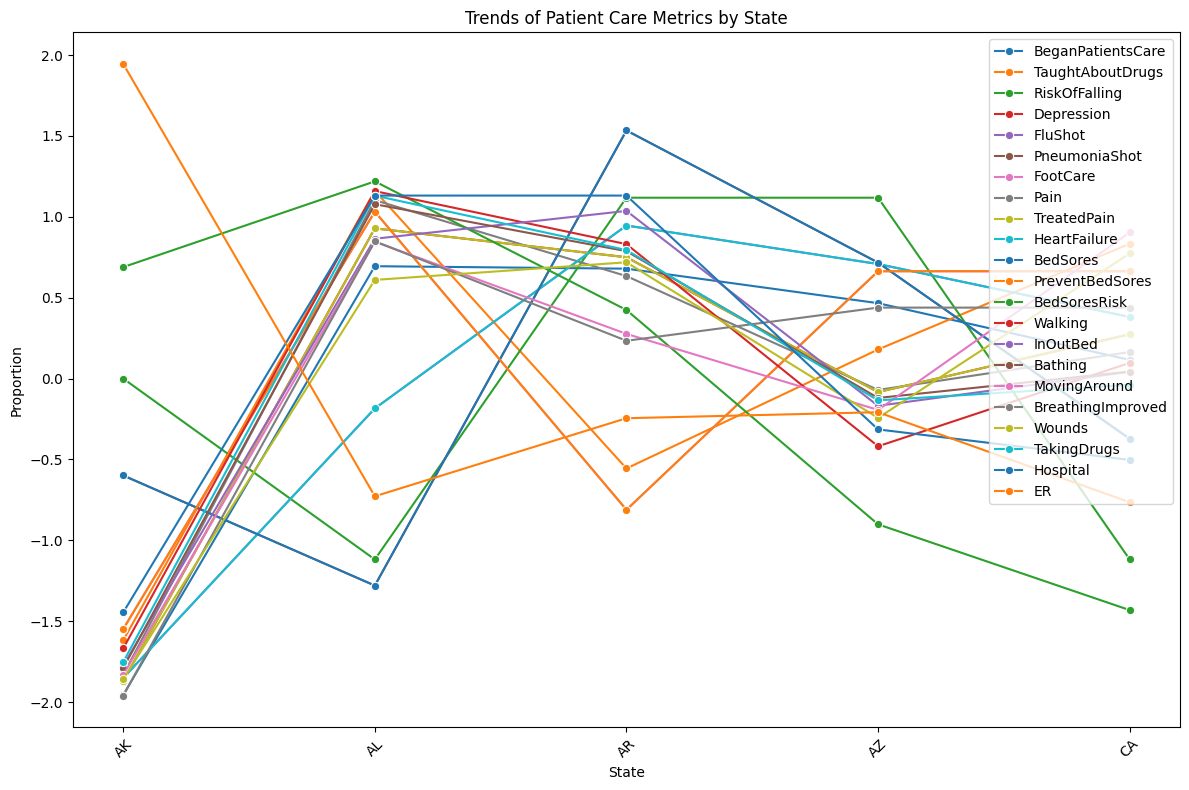

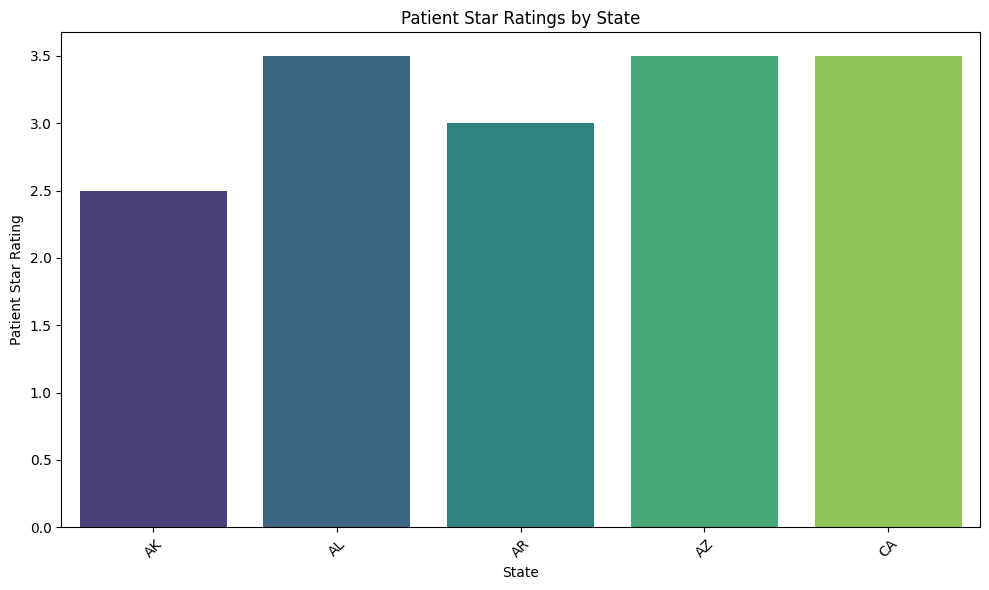

Graphs generated successfully!


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    'State': ['AK', 'AL', 'AR', 'AZ', 'CA'],
    'PatientStarRating': ['2.5', '3.5', '3', '3.5', '3.5'],
    'BeganPatientsCare': ['76.80%', '94.20%', '94.10%', '92.70%', '90.40%'],
    'TaughtAboutDrugs': ['93.90%', '97.30%', '95.20%', '96.10%', '96.90%'],
    'RiskOfFalling': ['99.20%', '99.10%', '99.30%', '99.30%', '99.10%'],
    'Depression': ['94.10%', '98.80%', '98.50%', '97.10%', '97.70%'],
    'FluShot': ['62.10%', '67.70%', '71.50%', '70.70%', '69.60%'],
    'PneumoniaShot': ['71.50%', '70%', '76.20%', '74.40%', '72%'],
    'FootCare': ['96.10%', '96.80%', '96.30%', '96.70%', '96.70%'],
    'Pain': ['97.20%', '99.70%', '99.30%', '98.70%', '98.90%'],
    'TreatedPain': ['94.10%', '98.80%', '98.50%', '97.10%', '97.70%'],
    'HeartFailure': ['62.10%', '67.70%', '71.50%', '70.70%', '69.60%'],
    'BedSores': ['71.50%', '70%', '76.20%', '74.40%', '72%'],
    'PreventBedSores': ['96.10%', '96.80%', '96.30%', '96.70%', '96.70%'],
    'BedSoresRisk': ['99.30%', '99.50%', '99.20%', '98.70%', '98.50%'],
    'Walking': ['53.50%', '71.60%', '69.50%', '61.50%', '64.80%'],
    'InOutBed': ['51.10%', '64.90%', '65.80%', '59.50%', '60.60%'],
    'Bathing': ['60.40%', '76.20%', '74.60%', '69.60%', '70.50%'],
    'MovingAround': ['55%', '73.80%', '69.80%', '66.50%', '74.20%'],
    'BreathingImproved': ['59.30%', '73%', '70%', '71%', '71%'],
    'Wounds': ['77.20%', '90.80%', '91.40%', '86.10%', '91.70%'],
    'TakingDrugs': ['43.50%', '61.50%', '59.40%', '53.60%', '54.20%'],
    'Hospital': ['13.10%', '17.20%', '17.20%', '14.90%', '14.60%'],
    'ER': ['19.20%', '12%', '13.30%', '13.40%', '11.90%']
})

# Identify percentage columns
percentage_columns = ['BeganPatientsCare', 'TaughtAboutDrugs', 'RiskOfFalling', 'Depression', 
                      'FluShot', 'PneumoniaShot', 'FootCare', 'Pain', 'TreatedPain', 
                      'HeartFailure', 'BedSores', 'PreventBedSores', 'BedSoresRisk', 
                      'Walking', 'InOutBed', 'Bathing', 'MovingAround', 'BreathingImproved', 
                      'Wounds', 'TakingDrugs', 'Hospital', 'ER']

# Strip '%' and convert to float
for col in percentage_columns:
    if col in data.columns:
        data[col] = data[col].str.rstrip('%').astype('float') / 100.0

# Convert 'PatientStarRating' to float, handling errors
data['PatientStarRating'] = pd.to_numeric(data['PatientStarRating'], errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Extract features and labels
features = data[percentage_columns]
labels = data['PatientStarRating']

# Ensure there are valid rows remaining
if features.empty or labels.empty:
    raise ValueError("No valid rows remaining after dropping NaNs. Please check your dataset for issues.")

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Add scaled features back to DataFrame for visualization
scaled_data = pd.DataFrame(scaled_features, columns=percentage_columns)
scaled_data['State'] = data['State'].values
scaled_data['PatientStarRating'] = data['PatientStarRating'].values

# Line Plot
plt.figure(figsize=(12, 8))
for col in percentage_columns:
    sns.lineplot(data=scaled_data, x='State', y=col, marker='o', label=col)
plt.title('Trends of Patient Care Metrics by State')
plt.ylabel('Proportion')
plt.xlabel('State')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=scaled_data, x='State', y='PatientStarRating', palette='viridis')
plt.title('Patient Star Ratings by State')
plt.ylabel('Patient Star Rating')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Graphs generated successfully!")
